# Day 08. Exercise 00
# Binary classifier. Logistic regression

## 0. Imports

In [1]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## 1. Preprocessing

- Get the data from the file [`checker-timestamp.csv`](https://drive.google.com/file/d/1pooM4cITtG249msX3GK_6W0eEiblzAf5/view?usp=sharing).


- Create a dataframe `df` with the columns: `date`, `am`, `pm`, `target`, where `date` is the date of the day, `am` is the number of the commits during the day before midday (integer), `pm` is the number of commits during the day after midday (integer), `target` is weekend/working_day.

In [2]:
df = pd.read_csv("../data/checker_timestamp.csv")
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3207 entries, 0 to 3206
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  3207 non-null   object
dtypes: object(1)
memory usage: 25.2+ KB


,timestamp
0,2020-04-17 05:19:02.744528
1,2020-04-17 05:22:35.249331
2,2020-04-17 05:22:45.549397
3,2020-04-17 05:34:14.691200
4,2020-04-17 05:34:24.422370
...,...
3202,2020-05-21 20:19:06.872761
3203,2020-05-21 20:22:41.785725
3204,2020-05-21 20:22:41.877806
3205,2020-05-21 20:37:00.129678


In [3]:
df["full_date"] = pd.to_datetime(df["timestamp"])
df["date"] = df["full_date"].dt.date
df["hour"] = df["full_date"].dt.hour
df

,timestamp,full_date,date,hour
0,2020-04-17 05:19:02.744528,2020-04-17 05:19:02.744528,2020-04-17,5
1,2020-04-17 05:22:35.249331,2020-04-17 05:22:35.249331,2020-04-17,5
2,2020-04-17 05:22:45.549397,2020-04-17 05:22:45.549397,2020-04-17,5
3,2020-04-17 05:34:14.691200,2020-04-17 05:34:14.691200,2020-04-17,5
4,2020-04-17 05:34:24.422370,2020-04-17 05:34:24.422370,2020-04-17,5
...,...,...,...,...
3202,2020-05-21 20:19:06.872761,2020-05-21 20:19:06.872761,2020-05-21,20
3203,2020-05-21 20:22:41.785725,2020-05-21 20:22:41.785725,2020-05-21,20
3204,2020-05-21 20:22:41.877806,2020-05-21 20:22:41.877806,2020-05-21,20
3205,2020-05-21 20:37:00.129678,2020-05-21 20:37:00.129678,2020-05-21,20


In [4]:
def ft_am_pm(hour):
    if hour < 12:
        return "am"
    else:
        return "pm"

In [5]:
def ft_day(date):
    if pd.to_datetime(date).dayofweek > 4:
        return "weekend"
    else:
        return "working_day"

In [6]:
df["target"] = df["full_date"].dt.dayofweek.apply(ft_day)
df["timestamp"] = df["full_date"].dt.hour.apply(ft_am_pm)
df["timestamp"].value_counts()

pm    2636
am     571
Name: timestamp, dtype: int64

In [7]:
df = df.groupby("timestamp")["date"].value_counts().unstack(0).fillna(0).rename_axis(None, axis=1).reset_index()
df["target"] = df["date"].apply(ft_day)
df

,date,am,pm,target
0,2020-04-17,21.0,2.0,working_day
1,2020-04-18,1.0,68.0,weekend
2,2020-04-19,18.0,15.0,weekend
3,2020-04-20,2.0,23.0,working_day
4,2020-04-21,0.0,25.0,working_day
5,2020-04-22,0.0,28.0,working_day
6,2020-04-23,10.0,33.0,working_day
7,2020-04-24,2.0,14.0,working_day
8,2020-04-25,30.0,74.0,weekend
9,2020-04-26,28.0,233.0,weekend


In [8]:
df["am"] = df["am"].astype(int)
df["pm"] = df["pm"].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    35 non-null     object
 1   am      35 non-null     int64 
 2   pm      35 non-null     int64 
 3   target  35 non-null     object
dtypes: int64(2), object(2)
memory usage: 1.2+ KB


## 2. Exploratory analysis

- Create a plot where `x` is am, `y` is pm, each dot is a day, working days and weekends must have different colors.


- By looking at the graph do you think it will be easy to classify the days having those two features? Put your answer in the markdown cell in the end of that sectioin: "yes, it is easy" or "no, it is not easy".

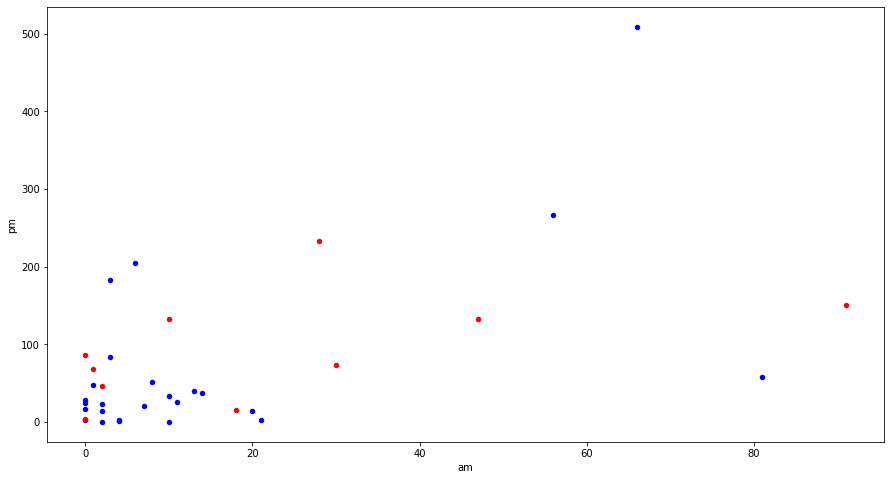

In [9]:
fig, ax = plt.subplots(figsize=(15, 8))
df[df["target"] == "working_day"].plot(kind="scatter", x="am", y="pm", ax=ax, color="b")
df[df["target"] == "weekend"].plot(kind="scatter", x="am", y="pm", ax=ax, color="r")
plt.show()

### Answer: no, it is not easy

## 3. Logistic regression

- Train logistic regression on your data using `am` and `pm`, parameters are: `random state=21`, `fit_intercept=False`.


- Make predictions for every day of your dataset and add them to your dataframe with the column name `predict`.


- Save the dataframe into a file in the subfolder of the day `data` with the name `am_pm.csv`.


- Draw another plot like you did before, but the color should be taken from the `predict`.


- By looking at the graph do you think if it made good predictions? Put your answer in the markdown cell in the end of that section: "yes, it is good"; "no, it is not good".

In [10]:
features = df.drop(columns=["date", "target"])
target = df["target"]

In [11]:
model = LogisticRegression(random_state=21, fit_intercept=False)
model.fit(features, target)
df["predict"] = model.predict(features)
df

,date,am,pm,target,predict
0,2020-04-17,21,2,working_day,weekend
1,2020-04-18,1,68,weekend,working_day
2,2020-04-19,18,15,weekend,working_day
3,2020-04-20,2,23,working_day,working_day
4,2020-04-21,0,25,working_day,working_day
5,2020-04-22,0,28,working_day,working_day
6,2020-04-23,10,33,working_day,working_day
7,2020-04-24,2,14,working_day,working_day
8,2020-04-25,30,74,weekend,working_day
9,2020-04-26,28,233,weekend,working_day


In [12]:
df.to_csv("../data/am_pm.csv")

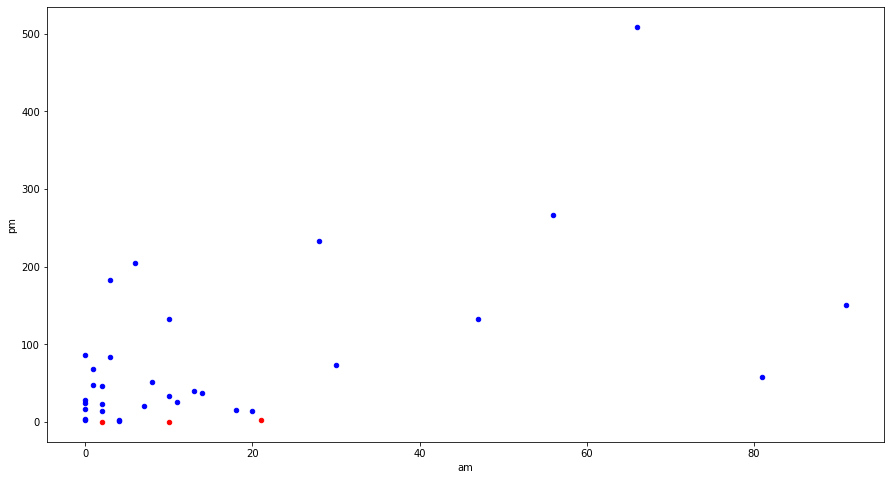

In [13]:
fig, ax = plt.subplots(figsize=(15, 8))
df[df["predict"] == "working_day"].plot(kind="scatter", x="am", y="pm", ax=ax, color="b")
df[df["predict"] == "weekend"].plot(kind="scatter", x="am", y="pm", ax=ax, color="r")
plt.show()


### Answer: no, it is not good


## 4. Evaluation

- Calculate `accuracy` for your predictions.


- Calculate `accuracy` for the naive case when each of your prediction is the value of your most popular class of the day.


- Comparing the accuracies do you think that the classifier made good predictions? Put your answer in the markdown cell in the end of the secion: "yes, it is good"; "no, it is not good".

In [14]:
accuracy = model.score(features, target)
accuracy

0.6285714285714286

In [15]:
df["target"].value_counts()

working_day    25
weekend        10
Name: target, dtype: int64

In [16]:
df["naive"] = 'working_day'
naive = accuracy_score(target, df["naive"])
naive

0.7142857142857143

### Answer: no, it is not good